In [1]:
%matplotlib inline
from initialize_dummy_spectrometer import *
from scipy.integrate import cumtrapz

In [2]:
sgs.frequency(7e9)
spectr.RecordSize(int(5000))
folder = "D:\\Jamie's Stuff\\Python\\Dummy spectrometer"
name = "test_save"
tag = "dummy"
spectr.RecordSize(60e3)

60000.0

Single shot mode
dummy memory cleared
loading...
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy setup AWG
sequence created
sequence created
sequence created
sequence created
loaded
dummy channel initialised
run dummy IQ data averaged complete
sequence built in 0.027s
waveforms pickled in 0.031s
Negative phase average 1 of 1 completed in 0.902 s
dummy channel initialised
run dummy IQ data averaged complete
sequence built in 0.032s
waveforms pickled in 0.048s
Positive phase average 1 of 1 completed in 0.899 s


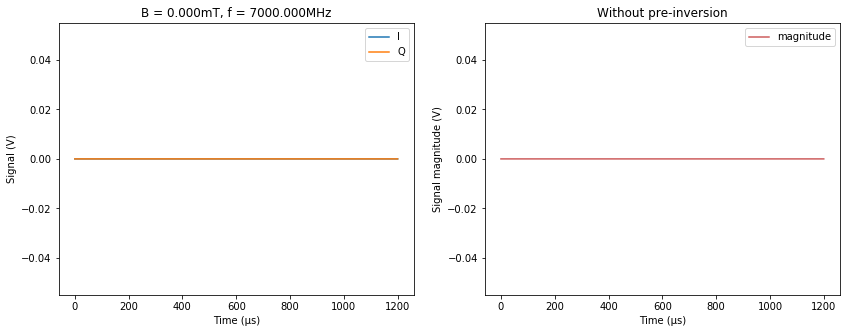

In [19]:
Pi =4e-6
wurst_freq = 0.5e6
wurst_amp = 1
pulse_amplitude = 0.008
wurst_Pi = 50e-6
wurst_inversion_Pi = wurst_Pi
long_wait = 10e-3
shot_rep = 0.1
python_delay = 0.8
python_avgs = 1#spectr.dig.NumberOfAverages()
wait = 60e-6

SRT = shot_rep+python_delay
SR = 1.28e9/(2**2)

name = str(datetime.datetime.fromtimestamp(time()).strftime('%Y_%m_%d_%H%M'))+"-"+tag
save = False

phase = 0


name = str(datetime.datetime.fromtimestamp(time()).strftime('%Y_%m_%d_%H%M'))+"-0xinv-"+tag
t_0xinv,I_0xinv,Q_0xinv,mag_0xinv = silenced_echo_sinh(Pi,wait,wurst_Pi,pulse_amplitude,wurst_amp,wurst_freq,long_wait,shot_rep,python_delay,SR = 1.28e9/(2**2),
                  wurst_inversion_Pi=None,phase = 0,python_avgs = 1,invert = False, pickle_input = True,pickle_output = True,
                  save= False,inversion_wurst_amp = None, wait2 = None,name = "",folder = "C:\\Users\\Administrator\\Documents\\",
                  saveraw = False,N_inv = 1,d_inv = 150e-9,window = 12,refpulse_amp = 0, w=0, nonlinearity = 4)

In [ ]:
wurst_freq = 0.5e6
phase = 0
wurst_Pi = 100e-6
wurst_amp = 1
nonlinearity = 3

wurst = heterodyne_wurst_sinh(wurst_freq,phase,wurst_Pi,amp=wurst_amp, nonlinearity = nonlinearity)
I,Q   = wfg.heterodyne_combine(wurst,w = 0,t0=0)
plt.xlabel(u"Time (\u03bcs)")
plt.ylabel("Pulse frequency (MHz)")
#plt.plot()

In [ ]:
def heterodyne_wurst_sinh(dw,phase,duration,SR = 1.28e9/(2**2), WURSTN=20, amp=1, nonlinearity = 3):

        points=int(duration*SR)
        t = np.linspace(0, duration, points)

        dt=t[1]-t[0]
        deltaw=dw
        startw = -dw/2
        tcent=duration/2
        AM = 1 - abs(np.sin((np.pi*(t-tcent))/duration))**WURSTN
        FM = np.sinh(np.linspace(-nonlinearity,nonlinearity,points))
        FM = dw/2*FM/FM.max()
        
        plt.plot(t*1e6,FM*1e-6)
        
        return ([AM*amp,360*cumtrapz(FM, initial=0)*dt+phase])

In [ ]:
def BIP(phase_params,time_intervals,duration,sample_rate):
    """
    Phase Params should be 4xN where N is number of time intervals
    """
    points=int(duration*sample_rate)
    t = np.linspace(0, duration, points)
    normalise_t_intervals = np.divide(time_intervals,time_intervals[-1])
    tau = (2*t/duration)-1
    cubic_vec = [1,tau,np.square(tau),np.power(tau,3)]

    interval_index = []
    phis = []
    for i in range(len(normalise_t_intervals)):
        interval_index.append(np.argmin(abs(tau-normalise_t_intervals[i])))
    
    for i in range(len(interval_index)):
        for dt in range(interval_index[i+1]-interval_index[i]):
            tau_slice = tau[interval_index[i]:interval_index[i+1]]
            cubic_vec = [1,tau_slice,np.square(tau_slice),np.power(tau_slice,3)]
            phi = np.dot(phase_params[i][:],cubic_vec)
            phis.append(phi)

    return phis

# 250-15-1382

In [ ]:
phase_params = [[0,0,12.3388,-0.37360],
                [9.68,-6.109,12.6895,-0.15535],
                [65.09,-25.300,13.9075,-0.07389],
                [-2126.58,812.761,-92.9098,4.46419],
                [-12358.11,4472.53,-528.0852,21.67046],
                [-83165.75,27391.088,-3000.4957,110.56624]]
time_intervals = [0,2.5654,5.1832,7.8010,8.8482,9.3717,10]
duration=10
sample_rate=1000

# 50-20-720

Inversion type: wurst

Refocus type: wurst

Single shot mode
dummy memory cleared
loading...
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy waveform loaded
dummy setup AWG
sequence created
sequence created
sequence created
sequence created
sequence created
sequence created
sequence created
sequence created
sequence created
sequence created
sequence created
sequence created
loaded
dummy channel initialised
run dummy IQ data averaged complete
sequence built in 0.053s
waveforms pickled in 0.043s
Negative phase average 1 of 1 completed in 1.801 s
dummy channel initialised
run dummy IQ data averaged complete
sequence built in 0.059s
waveforms pickled in 0.046s
Positive phase average 1 

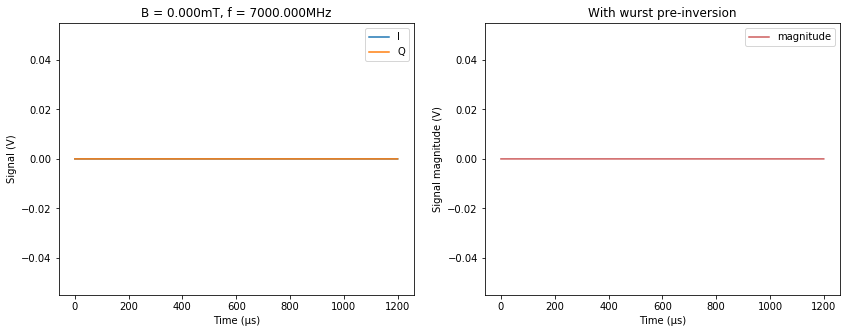

In [29]:
phase_params = [[0,0,1.0879,0.23278],
                [2.09,-2.865,2.3850,0.03950],
                [22.34,-16.172,5.2386,-0.15860],
                [-124.32,57.071,-6.9545,0.51800],
                [-6216.57,2353.392,-295.4618,12.60033],
                [88298.17,-28318.754,3019.9834,-106.76385],
                [335738.95,-105999.551,11148.6467,-390.28632],
                [-31146.49,7862.432,-628.1105,15.66463]]
time_intervals = [0,1.984,3.988,5.992,7.996,8.998,9.499,9.7996,10]

bip_Pi = 50e-6
bip_phases = phase_params
bip_intervals = time_intervals
bip_amp = 1

Pi = 4e-6
wurst_freq = 0.5e6
wurst_amp = 1
pulse_amplitude = 0.008
wurst_Pi = 50e-6
wurst_inversion_Pi = wurst_Pi
long_wait = 10e-3
shot_rep = 0.1
python_delay = 0.8
python_avgs = 1#spectr.dig.NumberOfAverages()
wait = 60e-6

SRT = shot_rep+python_delay
SR = 1.28e9/(2**2)

name = str(datetime.datetime.fromtimestamp(time()).strftime('%Y_%m_%d_%H%M'))+"-"+tag
save = False

phase = 0


name = str(datetime.datetime.fromtimestamp(time()).strftime('%Y_%m_%d_%H%M'))+"-0xinv-"+tag

(t,I,Q,mag) = BIP_silencing(Pi,pulse_amplitude,bip_Pi,bip_phases,bip_intervals,bip_amp,
                  wurst_Pi,wurst_freq,wurst_amp,long_wait, SR = 1.28e9/(2**5),
                  wait=50e-6, shot_rep=1,invert = True,invert_type="wurst",refocus_type="wurst",
                  wurst_inversion_Pi=None,bip_inversion_Pi=None,inversion_wurst_amp = None,inversion_bip_amp = None,
                  bip_inversion_phases=None, bip_inversion_intervals=None,full_aq=False,
                  phase = 0,python_avgs = 1, pickle_input = True,pickle_output = True,
                  save= False, wait2 = None,name = "", folder = "C:\\Users\\Administrator\\Documents\\",
                  saveraw = False,N_inv = 1,d_inv = 150e-9,window = 12,refpulse_amp = 0, w=0)

In [ ]:
points=int(duration*sample_rate)
t = np.linspace(0, duration, int(points/2))
normalise_t_intervals = time_intervals#np.divide(time_intervals,time_intervals[-1])
tau = ((t/duration))*10
cubic_vec = [1,tau,np.square(tau),np.power(tau,3)]
#phase_params = np.concatenate((phase_params,phase_params),axis=0)
interval_index = []
phis = np.array([])

for i in range(len(normalise_t_intervals)):
    interval_index.append(np.argmin(abs(tau-normalise_t_intervals[i])))

for i in range(len(interval_index)-1):
    tau_slice = abs(tau[interval_index[i]:interval_index[i+1]])
    cubic_vec = [np.power(tau_slice,0),tau_slice,np.square(tau_slice),np.power(tau_slice,3)]
    phi = np.dot(phase_params[i][:],cubic_vec)
    phis = np.concatenate((phis,phi),axis=0)


In [ ]:
plt.plot(tau[:-1],phis)
plt.vlines(time_intervals,ymin=0,ymax=np.max(phis),color='tab:red',linestyles="--")
plt.ylim(np.min(phis),np.max(phis))
plt.xlim(0,np.max(tau))
plt.ylabel("Phase (deg)")
plt.xlabel("Time")

In [ ]:
points=int(duration*sample_rate)
t = np.linspace(0,duration, 2*points)
normalise_t_intervals = np.multiply(time_intervals,-1)#np.divide(time_intervals,time_intervals[-1])
tau_n = -((t/duration))*10
cubic_vec = [1,tau,np.square(tau),np.power(tau,3)]
#phase_params = np.concatenate((phase_params,phase_params),axis=0)
interval_index = []
phis_n = np.array([])

for i in range(len(normalise_t_intervals)):
    interval_index.append(np.argmin(abs(tau_n-normalise_t_intervals[i])))

for i in range(len(interval_index)-1):
    tau_slice = abs(tau[interval_index[i]:interval_index[i+1]])
    cubic_vec = [np.power(tau_slice,0),tau_slice,np.square(tau_slice),np.power(tau_slice,3)]
    phi = np.dot(phase_params[i][:],cubic_vec)
    phis_n = np.concatenate((phis_n,phi),axis=0)
phis_n = phis_n[::-1]
tau_n = tau_n[::-1]

In [ ]:
plt.plot(tau_n[:-1],phis_n)
plt.vlines(np.multiply(time_intervals,-1),ymin=0,ymax=np.max(phis),color='tab:red',linestyles="--")
plt.ylim(np.min(phis_n),np.max(phis_n))
plt.xlim(np.min(tau_n),0)
plt.ylabel("Phase (deg)")
plt.xlabel("Time")

In [ ]:
plt.plot(np.append(tau_n[1:],tau[1:]),np.append(phis_n,phis))
#plt.vlines(np.multiply(time_intervals,-1),ymin=0,ymax=np.max(phis),color='tab:red',linestyles="--")
#plt.vlines(np.multiply(time_intervals,1),ymin=0,ymax=np.max(phis),color='tab:red',linestyles="--")
plt.ylim(np.min(phis_n),400)
plt.xlim(np.min(tau_n),np.max(tau))
plt.ylabel("Phase (deg)")
plt.xlabel("Time")

In [ ]:
points=int(duration*sample_rate)
t = np.linspace(-duration,duration, points)
normalise_t_intervals = np.multiply(time_intervals,-1)#np.divide(time_intervals,time_intervals[-1])

t_intervals_n = np.multiply(time_intervals[::-1],-1)
phase_params_n = phase_params[::-1]
normalise_t_intervals = np.concatenate((t_intervals_n[:-1],time_intervals))
total_phase_params = np.concatenate((phase_params_n,phase_params))

tau = ((t/duration))*10
cubic_vec = [1,tau,np.square(tau),np.power(tau,3)]
#phase_params = np.concatenate((phase_params,phase_params),axis=0)
interval_index = []
phis = np.array([])

for i in range(len(normalise_t_intervals)):
    interval_index.append(np.argmin(abs(tau-normalise_t_intervals[i])))

for i in range(len(interval_index)-1):
    tau_slice = abs(tau[interval_index[i]:interval_index[i+1]])
    cubic_vec = [np.power(tau_slice,0),tau_slice,np.square(tau_slice),np.power(tau_slice,3)]
    phi = np.dot(total_phase_params[i][:],cubic_vec)
    phis = np.concatenate((phis,phi))

In [ ]:
tau = (tau[:-1]/(10/duration) + duration)/2

plt.plot(tau,phis)

In [5]:
Pi =4e-6
wurst_freq = 0.5e6
wurst_amp = 1
pulse_amplitude = 0.008
wurst_Pi = 50e-6
wurst_inversion_Pi = wurst_Pi
long_wait = 10e-3
shot_rep = 0.1
python_delay = 0.8
python_avgs = 1#spectr.dig.NumberOfAverages()
wait = 60e-6
amp = 1

phase_params = [[0,0,12.3388,-0.37360],
                [9.68,-6.109,12.6895,-0.15535],
                [65.09,-25.300,13.9075,-0.07389],
                [-2126.58,812.761,-92.9098,4.46419],
                [-12358.11,4472.53,-528.0852,21.67046],
                [-83165.75,27391.088,-3000.4957,110.56624]]
time_intervals = [0,2.5654,5.1832,7.8010,8.8482,9.3717,10]
duration=10
sample_rate=1000

SRT = shot_rep+python_delay
SR = 1e5#1.28e9/(2**2)

name = str(datetime.datetime.fromtimestamp(time()).strftime('%Y_%m_%d_%H%M'))+"-"+tag
save = False

phase = 0


name = str(datetime.datetime.fromtimestamp(time()).strftime('%Y_%m_%d_%H%M'))+"-0xinv-"+tag
t_0xinv,I_0xinv,Q_0xinv,mag_0xinv = single_BIP(duration,phase_params,time_intervals,amp,SR,pickle_input=True,pickle_output=True)

NameError: name 'single_BIP' is not defined

In [ ]:
def single_BIP(duration,phase_params,time_intervals,amp,SR,pickle_input=True,pickle_output=True):
    
    wfg.sample_rate = SR
    
    w = np.pi*2*1e6*0
    gate_wait = 50e-9
    frequency = sgs.frequency()
    current_field = (ix.field()**2+iy.field()**2+iz.field()**2)**0.5
    spectr.awg.ClearMemory()
    d1 = wfg.heterodyne_delay(150e-9,0)
    
    BIP = wfg.BIP(duration,phase_params,time_intervals)
    
    d2 = wfg.heterodyne_delay(150e-9,0)
    
    #dt= wfg.pulse(single_shot,10e-6)
    #dd = wfg.delay(spectr.RecordSize()/spectr.dig.SampleRate())
    
    print('loading...')
    
    ###############################################################
    
    BIP_I,BIP_Q   = wfg.heterodyne_combine(d1, BIP,d1,w = w,t0=0)
    
    gate_len = len(BIP)/SR 
    acq_wait = 0
    
    BIP_gate      = wfg.pulse(1,gate_len)
    BIP_acq       = wfg.delay(gate_len)
    BIP_digitizer = wfg.delay(gate_len)
    
    BIP_seq = create_waveform("BIP",BIP_I    , BIP_Q    , BIP_gate, BIP_acq,BIP_digitizer)
    spectr.awg.ch12.create_sequence("SE_bip",BIP_seq,1)
    
    print('loaded')
    ###############################################################
    
    n_Is,n_Qs,p_Is,p_Qs = [],[],[],[]
    start_time = time()
    
    wfg.plot_waveforms(BIP_I,BIP_Q,BIP_gate,BIP_acq,SR)
    
    seq = BIP_seq
    spectr.awg.ch12.init_channel(seq[0])
    n_I, n_Q, timeI, timeQ = spectr.IQ_data_averaged()
    if pickle_input == True: pickle_sequence(seq,SR,address = "127.0.0.3")
    n_Is.append(downsample(n_I,window))
    n_Qs.append(downsample(n_Q,window))
    n_I = np.mean(n_Is,axis = 0)
    n_Q = np.mean(n_Qs,axis = 0)

    while (time()-start_time)<(shot_rep+python_delay-0.005): sleep(0.01)
    print('Negative phase average %i of %i completed in %.3f s'%(n+1,python_avgs,time()-start_time))
    start_time = time()

    seq = SE_p

    spectr.awg.ch12.init_channel(seq[0])
    p_I, p_Q, timeI, timeQ = spectr.IQ_data_averaged()
    if pickle_input == True: pickle_sequence(seq,SR,address = "127.0.0.2")
    p_Is.append(downsample(p_I,window))
    p_Qs.append(downsample(p_Q,window))
    p_I = np.mean(p_Is,axis = 0)
    p_Q = np.mean(p_Qs,axis = 0)

    PhasedI = np.subtract(p_I, n_I)
    PhasedQ = np.subtract(p_Q, n_Q)

    #Demodulate from intermediate carrier frequency
    t_demod = np.array(np.add(wfg.time(PhasedI, spectr.dig.SampleRate()),acq_wait))
    I, Q = wfg.signal_demod(PhasedI, PhasedQ,t_demod, w)

    #Downsample and average
    t = np.multiply(downsample(timeI,window),1e9)
    mag = np.sqrt(np.array(I)**2+np.array(Q)**2)

    #Plot
    if pickle_output == True: plot_pickle(t/1e9,I,Q)

    plot_IQmag(t,I,Q,mag,title1 = 'B = %.3fmT, f = %.3fMHz'%(current_field*1e3,frequency*1e-6))
    return(t,I,Q,mag)
    

In [28]:
def BIP_silencing(Pi,pulse_amplitude,bip_Pi,bip_phases,bip_intervals,bip_amp,
                  wurst_Pi,wurst_freq,wurst_amp,long_wait, SR = 1.28e9/(2**5),
                  wait=50e-6, shot_rep=1,invert_type=None,refocus_type="wurst",
                  wurst_inversion_Pi=None,bip_inversion_Pi=None,inversion_wurst_amp = None,inversion_bip_amp = None,
                  bip_inversion_phases=None, bip_inversion_intervals=None,
                  full_aq = False,phase = 0,python_avgs = 1,invert = False, pickle_input = True,pickle_output = True,
                  save= False, wait2 = None,name = "", folder = "C:\\Users\\Administrator\\Documents\\",
                  saveraw = False,N_inv = 1,d_inv = 150e-9,window = 12,refpulse_amp = 0, w=0):
    
    if refpulse_amp==0: refpulse_gate=0
    else: refpulse_gate = 1
    if wurst_inversion_Pi == None: wurst_inversion_Pi = wurst_Pi
    if inversion_wurst_amp == None: inversion_wurst_amp = wurst_amp
    if bip_inversion_Pi == None: bip_inversion_Pi = bip_Pi
    if inversion_bip_amp == None: inversion_bip_amp = bip_amp
    if bip_inversion_phases == None: bip_inversion_phases = bip_phases
    if bip_inversion_intervals == None: bip_inversion_intervals = bip_intervals
    if wait2==None: wait2 = 2*wait
    if full_aq == True: full_aq_amp = 1
    else: full_aq_amp = 0

    if invert == True:
        if invert_type != None:
            title2 = "With {} pre-inversion".format(invert_type)
            name = name+"{}_inverted".format(invert_type)
            
        else:
            raise Exception("Invert set to TRUE but no Type specified")

    else:title2 = "Without pre-inversion"
    
    
    print("Inversion type: {}\n".format(invert_type))
    print("Refocus type: {}\n".format(refocus_type))
        
    wfg.sample_rate = SR
    w = 0
    gate_wait = 50e-9
    frequency = sgs.frequency()
    current_field = (ix.field()**2+iy.field()**2+iz.field()**2)**0.5
    
    if spectr.dig.NumberOfAverages()==1:
        single_shot = 1  #This adds an extra digitiser trigger to make single shot take less time
        print("Single shot mode")
    else: single_shot=0
        
    ##############################################################
    #Define and load all fixed pulses and waveforms here:
    
    spectr.awg.ClearMemory()
    d1 = wfg.heterodyne_delay(150e-9,0)
    d1_inv = wfg.heterodyne_delay(d_inv,0)
    
    piebytwo = wfg.heterodyne_pulse(pulse_amplitude,Pi/2,phase)
    piebytwo_neg= wfg.heterodyne_pulse(pulse_amplitude,Pi/2,phase+180)
    
    d2 = wfg.heterodyne_delay(wait,0)

    pie = wfg.heterodyne_pulse(pulse_amplitude,Pi,phase)
    pie_neg = wfg.heterodyne_pulse(pulse_amplitude,Pi,phase) # leave identical to pie unless you want to phase cycle the pi pulse!

    wurst = wfg.heterodyne_wurst_pulse(wurst_freq,phase,wurst_Pi,amp=wurst_amp)
    wurst_inversion = wfg.heterodyne_wurst_pulse(wurst_freq,phase,wurst_inversion_Pi,amp=inversion_wurst_amp)
    
    bip = wfg.BIP(bip_Pi,bip_phases,bip_intervals,bip_amp)
    bip_inversion = wfg.BIP(bip_inversion_Pi,bip_phases,bip_intervals,inversion_bip_amp)
    
    
    d3= wfg.heterodyne_delay(wait-19e-6,0)

    dt= wfg.pulse(single_shot,10e-6)
    dd = wfg.delay(spectr.RecordSize()/spectr.dig.SampleRate())
    
    print('loading...')

    ###############################################################
    #WURST pi pulse with acquisition

    wa_I,wa_Q     = wfg.heterodyne_combine(d1,wurst,d1,w = w,t0=0)

    wa_I_neg,wa_Q_neg = -wa_I,-wa_Q

    gate_len = len(wa_I)/SR
    acq_wait = gate_len+wait-25e-6

    wa_gate = wfg.pulse(1,gate_len)
    wa_acq = wfg.combine(wfg.delay(acq_wait),wfg.pulse(1-full_aq_amp,300e-6))
    wa_digitizer = wfg.combine(wfg.delay(acq_wait),wfg.pulse(1-full_aq_amp,300e-6))

    wa_pos = create_waveform("wa_pos",wa_I    , wa_Q    , wa_gate, wa_acq,wa_digitizer)
    wa_neg = create_waveform("wa_neg",wa_I_neg, wa_Q_neg, wa_gate, wa_acq,wa_digitizer)
    #pickle_waveforms(*wa_pos[1:],SR)
    
    ###############################################################
    #BIP pi with acquisition

    bipa_I,bipa_Q     = wfg.heterodyne_combine(d1,bip,d1,w = w,t0=0)

    bipa_I_neg,bipa_Q_neg = -bipa_I,-bipa_Q

    gate_len = len(bipa_I)/SR
    acq_wait = gate_len+wait-25e-6

    bipa_gate = wfg.pulse(1,gate_len)
    bipa_acq = wfg.combine(wfg.delay(acq_wait),wfg.pulse(1-full_aq_amp,300e-6))
    bipa_digitizer = wfg.combine(wfg.delay(acq_wait),wfg.pulse(1-full_aq_amp,300e-6))

    bipa_pos = create_waveform("bipa_pos",bipa_I    , bipa_Q    , bipa_gate, bipa_acq,bipa_digitizer)
    bipa_neg = create_waveform("bipa_neg",bipa_I_neg, bipa_Q_neg, bipa_gate, bipa_acq,bipa_digitizer)
    #pickle_waveforms(*wa_pos[1:],SR)

    ###############################################################
    #WURST pulse

    wurst_I,wurst_Q     = wfg.heterodyne_combine(d1,wurst,d1,w = w,t0=0)

    wurst_I_neg,wurst_Q_neg = -wurst_I,-wurst_Q #wfg.heterodyne_combine(d1,-wurst_h,d1,w = w,t0=0)

    gate_len = len(wurst_I)/SR
    acq_wait = 0

    wurst_gate      = wfg.pulse(1,gate_len)
    wurst_acq       = wfg.delay(gate_len)
    wurst_digitizer = wfg.delay(gate_len)

    wurst_pos = create_waveform("wurst_pos",wurst_I    , wurst_Q    , wurst_gate, wurst_acq,wurst_digitizer)
    wurst_neg = create_waveform("wurst_neg",wurst_I_neg, wurst_Q_neg, wurst_gate, wurst_acq,wurst_digitizer)

    ###############################################################
    #WURST inversion pulse

    wurst_inversion_I,wurst_inversion_Q     = wfg.heterodyne_combine(d1,wurst_inversion,d1_inv,w = w,t0=0)

    wurst_inversion_I_neg, wurst_inversion_Q_neg = -wurst_inversion_I,-wurst_inversion_Q

    #print(d_inv,len(wurst_inversion_I))

    gate_len = 150e-9-d_inv+len(wurst_inversion_I)/SR
    acq_wait = 0

    wurst_gate      = wfg.pulse(1,gate_len)
    wurst_acq       = wfg.delay(gate_len)
    wurst_digitizer = wfg.delay(gate_len)

    wurst_inversion_pos = create_waveform("wurst_inversion_pos",wurst_inversion_I    , wurst_inversion_Q    , wurst_gate, wurst_acq,wurst_digitizer)
    wurst_inversion_neg = create_waveform("wurst_inversion_neg",wurst_inversion_I_neg, wurst_inversion_Q_neg, wurst_gate, wurst_acq,wurst_digitizer)

    #pickle_waveforms(*wurst_pos[1:],SR)
    
    ###############################################################
    #BIP

    bip_I,bip_Q     = wfg.heterodyne_combine(d1,bip,d1,w = w,t0=0)

    bip_I_neg,bip_Q_neg = -bip_I,-bip_Q #wfg.heterodyne_combine(d1,-wurst_h,d1,w = w,t0=0)

    gate_len = len(bip_I)/SR
    acq_wait = 0

    bip_gate      = wfg.pulse(1,gate_len)
    bip_acq       = wfg.delay(gate_len)
    bip_digitizer = wfg.delay(gate_len)

    bip_pos = create_waveform("bip_pos",bip_I    , bip_Q    , bip_gate, bip_acq,bip_digitizer)
    bip_neg = create_waveform("bip_neg",bip_I_neg, bip_Q_neg, bip_gate, bip_acq,bip_digitizer)

    ###############################################################
    #BIP inversion

    bip_inversion_I,bip_inversion_Q     = wfg.heterodyne_combine(d1,bip_inversion,d1_inv,w = w,t0=0)

    bip_inversion_I_neg, bip_inversion_Q_neg = -bip_inversion_I,-bip_inversion_Q

    #print(d_inv,len(wurst_inversion_I))

    gate_len = 150e-9-d_inv+len(bip_inversion_I)/SR
    acq_wait = 0

    bip_gate      = wfg.pulse(1,gate_len)
    bip_acq       = wfg.delay(gate_len)
    bip_digitizer = wfg.delay(gate_len)

    bip_inversion_pos = create_waveform("bip_inversion_pos",bip_inversion_I    , bip_inversion_Q    , bip_gate, bip_acq,bip_digitizer)
    bip_inversion_neg = create_waveform("bip_inversion_neg",bip_inversion_I_neg, bip_inversion_Q_neg, bip_gate, bip_acq,bip_digitizer)

    #pickle_waveforms(*wurst_pos[1:],SR)
    
    ###############################################################
    #Excitation waveform
    I_in_pos,Q_in_pos =  wfg.heterodyne_combine(d1,piebytwo,d2,w = w,t0=0)
    I_in_neg,Q_in_neg = wfg.heterodyne_combine(d1,piebytwo_neg,d2,w = w,t0=0)

    gate_len = len(I_in_pos)/SR

    marker_gate = wfg.combine(wfg.delay(gate_wait),wfg.pulse(1,Pi/2+200e-9))
    marker_acq = wfg.pulse(full_aq_amp,gate_len)
    marker_digitizer = wfg.pulse(full_aq_amp,gate_len)

    In_pos = create_waveform("In_pos",I_in_pos, Q_in_pos, marker_gate,marker_acq,marker_digitizer)
    In_neg = create_waveform("In_neg",I_in_neg, Q_in_neg, marker_gate,marker_acq,marker_digitizer)

    #pickle_waveforms(*In_pos[1:],SR)
    
    
    ################################################################
    # delay waveform for reptime setting
    end_delay = 100e-6
    delay = create_waveform("delay",*[wfg.delay(end_delay)]*5)
    ###############################################################
    # delay waveform for inter-pulse delay
    short_delay = 1e-6
    ip_delay = create_waveform("ip_delay",*[wfg.delay(short_delay)]*5)
    ###############################################################
    # end trigger for digitiser reset
    r1 = wfg.delay(10e-6)
    r2 = wfg.pulse(refpulse_amp,10e-6)
    r3 = wfg.pulse(refpulse_gate,10e-6)
    reset = create_waveform("reset",r2,r1,r3,r1,wfg.combine(dd,dt))
    ###############################################################
    AWG_auto_setup(SR)
    
    ###############################################################
    ### WURST INVERSIONS:
    # wurst refocus
    SE_w_inv_w_refoc_p = ['SE_w_inv_w_refoc_p',[wurst_inversion_pos,delay,In_pos,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_w_inv_w_refoc_p[0],[SE_w_inv_w_refoc_p[1][n][0]\
                                                           for n in range(len(SE_w_inv_w_refoc_p[1]))],SE_w_inv_w_refoc_p[2])

    SE_w_inv_w_refoc_n = ['SE_w_inv_w_refoc_n',[wurst_inversion_pos,delay,In_neg,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_w_inv_w_refoc_n[0],[SE_w_inv_w_refoc_n[1][n][0]\
                                                           for n in range(len(SE_w_inv_w_refoc_n[1]))],SE_w_inv_w_refoc_n[2])
    # bip refocus
    SE_w_inv_b_refoc_p = ['SE_w_inv_b_refoc_p',[wurst_inversion_pos,delay,In_pos,bip_pos,ip_delay,bipa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_w_inv_b_refoc_p[0],[SE_w_inv_b_refoc_p[1][n][0]\
                                                           for n in range(len(SE_w_inv_b_refoc_p[1]))],SE_w_inv_b_refoc_p[2])

    SE_w_inv_b_refoc_n = ['SE_w_inv_b_refoc_n',[wurst_inversion_pos,delay,In_neg,bip_pos,ip_delay,bipa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_w_inv_b_refoc_n[0],[SE_w_inv_b_refoc_n[1][n][0]\
                                                           for n in range(len(SE_w_inv_b_refoc_n[1]))],SE_w_inv_b_refoc_n[2])
    
    ### BIP INVERSIONS:
    # wurst refocus
    SE_b_inv_w_refoc_p = ['SE_b_inv_w_refoc_p',[bip_inversion_pos,delay,In_pos,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_b_inv_w_refoc_p[0],[SE_b_inv_w_refoc_p[1][n][0]\
                                                           for n in range(len(SE_b_inv_w_refoc_p[1]))],SE_b_inv_w_refoc_p[2])

    SE_b_inv_w_refoc_n = ['SE_b_inv_w_refoc_n',[bip_inversion_pos,delay,In_neg,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_b_inv_w_refoc_n[0],[SE_b_inv_w_refoc_n[1][n][0]\
                                                           for n in range(len(SE_b_inv_w_refoc_n[1]))],SE_b_inv_w_refoc_n[2])
    # bip refocus
    SE_b_inv_b_refoc_p = ['SE_b_inv_b_refoc_p',[bip_inversion_pos,delay,In_pos,bip_pos,ip_delay,bipa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_b_inv_b_refoc_p[0],[SE_b_inv_b_refoc_p[1][n][0]\
                                                           for n in range(len(SE_b_inv_b_refoc_p[1]))],SE_b_inv_b_refoc_p[2])

    SE_b_inv_b_refoc_n = ['SE_b_inv_b_refoc_n',[bip_inversion_pos,delay,In_neg,bip_pos,ip_delay,bipa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_b_inv_b_refoc_n[0],[SE_b_inv_b_refoc_n[1][n][0]\
                                                           for n in range(len(SE_b_inv_b_refoc_n[1]))],SE_b_inv_b_refoc_n[2])
    
    ### NO INVERSIONS:
    # wurst refocus:
    SE_n_inv_w_refoc_p = ['SE_n_inv_w_refoc_p',[In_pos,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_n_inv_w_refoc_p[0],[SE_n_inv_w_refoc_p[1][n][0]\
                                                           for n in range(len(SE_n_inv_w_refoc_p[1]))],SE_n_inv_w_refoc_p[2])

    SE_n_inv_w_refoc_n = ['SE_n_inv_w_refoc_n',[In_neg,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_n_inv_w_refoc_n[0],[SE_n_inv_w_refoc_n[1][n][0]\
                                                           for n in range(len(SE_n_inv_w_refoc_n[1]))],SE_n_inv_w_refoc_n[2])
    # bip refocus:
    SE_n_inv_b_refoc_p = ['SE_n_inv_b_refoc_p',[In_pos,bip_pos,ip_delay,bipa_pos,reset,delay],
                    [1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_n_inv_b_refoc_p[0],[SE_n_inv_b_refoc_p[1][n][0]\
                                                           for n in range(len(SE_n_inv_b_refoc_p[1]))],SE_n_inv_b_refoc_p[2])

    SE_n_inv_b_refoc_n = ['SE_n_inv_b_refoc_n',[In_neg,bip_pos,ip_delay,bipa_pos,reset,delay],
                    [1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_n_inv_b_refoc_n[0],[SE_n_inv_b_refoc_n[1][n][0]\
                                                           for n in range(len(SE_n_inv_b_refoc_n[1]))],SE_n_inv_b_refoc_n[2])    

    print('loaded')
    
    ###############################################################

    # Run sequences: positive and negative for phase cycling
    
    n_Is,n_Qs,p_Is,p_Qs = [],[],[],[]
    for n in range(python_avgs):
        start_time = time()

        if invert == True: 
            if invert_type == "wurst" and refocus_type == "wurst":
                seq = SE_w_inv_w_refoc_n
            elif invert_type == "wurst" and refocus_type == "bip":
                seq = SE_w_inv_b_refoc_n
            elif invert_type == "bip" and refocus_type == "wurst":
                seq = SE_b_inv_w_refoc_n
            elif invert_type == "bip" and refocus_type == "bip":
                seq = SE_b_inv_b_refoc_n
        else:
            if refocus_type == "wurst":
                seq = SE_n_inv_w_refoc_n
            elif refocus_type == "bip":
                seq = SE_n_inv_b_refoc_n

        spectr.awg.ch12.init_channel(seq[0])
        n_I, n_Q, timeI, timeQ = spectr.IQ_data_averaged()
        if pickle_input == True: pickle_sequence(seq,SR,address = "127.0.0.3")
        n_Is.append(downsample(n_I,window))
        n_Qs.append(downsample(n_Q,window))
        n_I = np.mean(n_Is,axis = 0)
        n_Q = np.mean(n_Qs,axis = 0)

        while (time()-start_time)<(shot_rep+python_delay-0.005): sleep(0.01)
        print('Negative phase average %i of %i completed in %.3f s'%(n+1,python_avgs,time()-start_time))
        start_time = time()

        if invert == True: 
            if invert_type == "wurst" and refocus_type == "wurst":
                seq = SE_w_inv_w_refoc_p
            elif invert_type == "wurst" and refocus_type == "bip":
                seq = SE_w_inv_b_refoc_p
            elif invert_type == "bip" and refocus_type == "wurst":
                seq = SE_b_inv_w_refoc_p
            elif invert_type == "bip" and refocus_type == "bip":
                seq = SE_b_inv_b_refoc_p
        else:
            if refocus_type == "wurst":
                seq = SE_n_inv_w_refoc_p
            elif refocus_type == "bip":
                seq = SE_n_inv_b_refoc_p
                
        spectr.awg.ch12.init_channel(seq[0])
        p_I, p_Q, timeI, timeQ = spectr.IQ_data_averaged()
        if pickle_input == True: pickle_sequence(seq,SR,address = "127.0.0.2")
        p_Is.append(downsample(p_I,window))
        p_Qs.append(downsample(p_Q,window))
        p_I = np.mean(p_Is,axis = 0)
        p_Q = np.mean(p_Qs,axis = 0)

        PhasedI = np.subtract(p_I, n_I)
        PhasedQ = np.subtract(p_Q, n_Q)

        #Demodulate from intermediate carrier frequency
        t_demod = np.array(np.add(wfg.time(PhasedI, spectr.dig.SampleRate()),acq_wait))
        I, Q = wfg.signal_demod(PhasedI, PhasedQ,t_demod, w)

        #Downsample and average
        t = np.multiply(downsample(timeI,window),1e9)
        mag = np.sqrt(np.array(I)**2+np.array(Q)**2)

        #Plot
        if pickle_output == True: plot_pickle(t/1e9,I,Q)

        if save==True:
            if saveraw == True:
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_pI.txt",p_Is)
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_pQ.txt",p_Qs)
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_nI.txt",n_Is)
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_nQ.txt",n_Qs)
            np.savetxt(folder+"\\"+name+"silencedEcho.txt",np.transpose([t,I,Q,mag]))
            plot_IQmag(t,I,Q,mag,title2 = title2,title1 = 'B = %.3fmT, f = %.3fMHz'%(current_field*1e3,frequency*1e-6), show = False)
            plt.savefig(folder+"\\"+name+"silencedEcho.pdf")
            plt.close()
        while (time()-start_time)<(shot_rep+python_delay-0.005): sleep(0.01)
        print('Positive phase average %i of %i completed in %.3f s'%(n+1,python_avgs,time()-start_time))

    plot_IQmag(t,I,Q,mag,title2 = title2,title1 = 'B = %.3fmT, f = %.3fMHz'%(current_field*1e3,frequency*1e-6))
    return(t,I,Q,mag)
    
    

In [ ]:
def silenced_echo_heterodyne(Pi,wait,wurst_Pi,pulse_amplitude,wurst_amp,wurst_freq,long_wait,shot_rep,python_delay,SR = 1.28e9/(2**2),
                  wurst_inversion_Pi=None,phase = 0,python_avgs = 1,invert = False, pickle_input = True,pickle_output = True,
                  save= False,inversion_wurst_amp = None, wait2 = None,name = "",folder = "C:\\Users\\Administrator\\Documents\\",
                  saveraw = False,N_inv = 1,d_inv = 150e-9,window = 12,refpulse_amp = 0, w=0):
    if refpulse_amp==0: refpulse_gate=0
    else: refpulse_gate = 1
    if wurst_inversion_Pi==None: wurst_inversion_Pi = wurst_Pi
    if inversion_wurst_amp == None: inversion_wurst_amp = wurst_amp
    if wait2==None: wait2 = 2*wait

    if invert == True:
        title2 = "With pre-inversion"
        name = name+"inverted"

    else: title2 = "Without pre-inversion"

    wfg.sample_rate = SR


    gate_wait = 50e-9
    frequency = sgs.frequency()
    current_field = (ix.field()**2+iy.field()**2+iz.field()**2)**0.5

    if spectr.dig.NumberOfAverages()==1:
        single_shot = 1  #This adds an extra digitiser trigger to make single shot take less time
        print("Single shot mode")
    else: single_shot=0

    ##############################################################
    #Define and load all fixed pulses and waveforms here:
    spectr.awg.ClearMemory()
    d1 = wfg.heterodyne_delay(150e-9,0)
    d1_inv = wfg.heterodyne_delay(d_inv,0)
    #d1_cart = wfg.delay(150e-9)
    #d_inv_cart = wfg.delay(d_inv)

    piebytwo = wfg.heterodyne_pulse(pulse_amplitude,Pi/2,phase)
    piebytwo_neg= wfg.heterodyne_pulse(pulse_amplitude,Pi/2,phase+180)

    d2 = wfg.heterodyne_delay(wait,0)

    pie = wfg.heterodyne_pulse(pulse_amplitude,Pi,phase)
    pie_neg = wfg.heterodyne_pulse(pulse_amplitude,Pi,phase) # leave identical to pie unless you want to phase cycle the pi pulse!

    #wurst = wfg.wurst_pulse(wurst_freq,phase,wurst_Pi,amp=wurst_amp)
    #wurst_inversion = wfg.wurst_pulse(wurst_freq,phase,wurst_inversion_Pi,amp=inversion_wurst_amp)
    wurst = wfg.heterodyne_wurst_pulse(wurst_freq,phase,wurst_Pi,amp=wurst_amp)
    wurst_inversion = wfg.heterodyne_wurst_pulse(wurst_freq,phase,wurst_inversion_Pi,amp=inversion_wurst_amp)

    d3= wfg.heterodyne_delay(wait-19e-6,0)

    dt= wfg.pulse(single_shot,10e-6)
    dd = wfg.delay(spectr.RecordSize()/spectr.dig.SampleRate())

    print('loading...')

    ###############################################################
    #WURST pi pulse with acquisition

    wa_I,wa_Q     = wfg.heterodyne_combine(d1,wurst,d1,w = w,t0=0)

    wa_I_neg,wa_Q_neg = -wa_I,-wa_Q

    gate_len = len(wa_I)/SR
    acq_wait = gate_len+wait-25e-6

    wa_gate = wfg.pulse(1,gate_len)
    wa_acq = wfg.combine(wfg.delay(acq_wait),wfg.pulse(1,300e-6))
    wa_digitizer = wfg.combine(wfg.delay(acq_wait),wfg.pulse(1,300e-6))

    wa_pos = create_waveform("wa_pos",wa_I    , wa_Q    , wa_gate, wa_acq,wa_digitizer)
    wa_neg = create_waveform("wa_neg",wa_I_neg, wa_Q_neg, wa_gate, wa_acq,wa_digitizer)
    #pickle_waveforms(*wa_pos[1:],SR)

    ###############################################################
    #WURST inversion pulse

    wurst_I,wurst_Q     = wfg.heterodyne_combine(d1,wurst,d1,w = w,t0=0)

    wurst_I_neg,wurst_Q_neg = -wurst_I,-wurst_Q #wfg.heterodyne_combine(d1,-wurst_h,d1,w = w,t0=0)

    gate_len = len(wurst_I)/SR
    acq_wait = 0

    wurst_gate      = wfg.pulse(1,gate_len)
    wurst_acq       = wfg.delay(gate_len)
    wurst_digitizer = wfg.delay(gate_len)

    wurst_pos = create_waveform("wurst_pos",wurst_I    , wurst_Q    , wurst_gate, wurst_acq,wurst_digitizer)
    wurst_neg = create_waveform("wurst_neg",wurst_I_neg, wurst_Q_neg, wurst_gate, wurst_acq,wurst_digitizer)

    ###############################################################
    #WURST inversion pulse

    wurst_inversion_I,wurst_inversion_Q     = wfg.heterodyne_combine(d1,wurst_inversion,d1_inv,w = w,t0=0)

    wurst_inversion_I_neg, wurst_inversion_Q_neg = -wurst_inversion_I,-wurst_inversion_Q

    #print(d_inv,len(wurst_inversion_I))

    gate_len = 150e-9-d_inv+len(wurst_inversion_I)/SR
    acq_wait = 0

    wurst_gate      = wfg.pulse(1,gate_len)
    wurst_acq       = wfg.delay(gate_len)
    wurst_digitizer = wfg.delay(gate_len)

    wurst_inversion_pos = create_waveform("wurst_inversion_pos",wurst_inversion_I    , wurst_inversion_Q    , wurst_gate, wurst_acq,wurst_digitizer)
    wurst_inversion_neg = create_waveform("wurst_inversion_neg",wurst_inversion_I_neg, wurst_inversion_Q_neg, wurst_gate, wurst_acq,wurst_digitizer)

    #pickle_waveforms(*wurst_pos[1:],SR)
    ###############################################################
    #Excitation waveform
    I_in_pos,Q_in_pos =  wfg.heterodyne_combine(d1,piebytwo,d2,w = w,t0=0)
    I_in_neg,Q_in_neg = wfg.heterodyne_combine(d1,piebytwo_neg,d2,w = w,t0=0)

    gate_len = len(I_in_pos)/SR

    marker_gate = wfg.combine(wfg.delay(gate_wait),wfg.pulse(1,Pi/2+200e-9))
    marker_acq = wfg.delay(gate_len)
    marker_digitizer = wfg.delay(gate_len)

    In_pos = create_waveform("In_pos",I_in_pos, Q_in_pos, marker_gate,marker_acq,marker_digitizer)
    In_neg = create_waveform("In_neg",I_in_neg, Q_in_neg, marker_gate,marker_acq,marker_digitizer)

    #pickle_waveforms(*In_pos[1:],SR)
    ################################################################
    # delay waveform for reptime setting
    end_delay = 100e-6
    delay = create_waveform("delay",*[wfg.delay(end_delay)]*5)
    ###############################################################
    # delay waveform for inter-pulse delay
    short_delay = 1e-6
    ip_delay = create_waveform("ip_delay",*[wfg.delay(short_delay)]*5)
    ###############################################################
    # end trigger for digitiser reset
    r1 = wfg.delay(10e-6)
    r2 = wfg.pulse(refpulse_amp,10e-6)
    r3 = wfg.pulse(refpulse_gate,10e-6)
    reset = create_waveform("reset",r2,r1,r3,r1,wfg.combine(dd,dt))
    ###############################################################
    AWG_auto_setup(SR)

    SE_inv_p = ['SE_inv_p',[wurst_inversion_pos,delay,In_pos,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_inv_p[0],[SE_inv_p[1][n][0] for n in range(len(SE_inv_p[1]))],SE_inv_p[2])

    SE_inv_n = ['SE_inv_n',[wurst_inversion_pos,delay,In_neg,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [N_inv,int(long_wait/end_delay),1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_inv_n[0],[SE_inv_n[1][n][0] for n in range(len(SE_inv_n[1]))],SE_inv_n[2])

    SE_p = ['SE_p',[In_pos,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_p[0],[SE_p[1][n][0] for n in range(len(SE_p[1]))],SE_p[2])

    SE_n = ['SE_n',[In_neg,wurst_pos,ip_delay,wa_pos,reset,delay],
                    [1,1,int(wait2/short_delay),1,1,int(shot_rep/end_delay)]]
    spectr.awg.ch12.create_sequence(SE_n[0],[SE_n[1][n][0] for n in range(len(SE_n[1]))],SE_n[2])

    print('loaded')
    ###############################################################

    # Run sequences: positive and negative for phase cycling
    n_Is,n_Qs,p_Is,p_Qs = [],[],[],[]
    for n in range(python_avgs):
        start_time = time()

        if invert == True: seq = SE_inv_n
        else: seq = SE_n
        spectr.awg.ch12.init_channel(seq[0])
        n_I, n_Q, timeI, timeQ = spectr.IQ_data_averaged()
        if pickle_input == True: pickle_sequence(seq,SR,address = "127.0.0.3")
        n_Is.append(downsample(n_I,window))
        n_Qs.append(downsample(n_Q,window))
        n_I = np.mean(n_Is,axis = 0)
        n_Q = np.mean(n_Qs,axis = 0)

        while (time()-start_time)<(shot_rep+python_delay-0.005): sleep(0.01)
        print('Negative phase average %i of %i completed in %.3f s'%(n+1,python_avgs,time()-start_time))
        start_time = time()

        if invert == True: seq = SE_inv_p
        else: seq = SE_p

        spectr.awg.ch12.init_channel(seq[0])
        p_I, p_Q, timeI, timeQ = spectr.IQ_data_averaged()
        if pickle_input == True: pickle_sequence(seq,SR,address = "127.0.0.2")
        p_Is.append(downsample(p_I,window))
        p_Qs.append(downsample(p_Q,window))
        p_I = np.mean(p_Is,axis = 0)
        p_Q = np.mean(p_Qs,axis = 0)

        PhasedI = np.subtract(p_I, n_I)
        PhasedQ = np.subtract(p_Q, n_Q)

        #Demodulate from intermediate carrier frequency
        t_demod = np.array(np.add(wfg.time(PhasedI, spectr.dig.SampleRate()),acq_wait))
        I, Q = wfg.signal_demod(PhasedI, PhasedQ,t_demod, w)

        #Downsample and average
        t = np.multiply(downsample(timeI,window),1e9)
        mag = np.sqrt(np.array(I)**2+np.array(Q)**2)

        #Plot
        if pickle_output == True: plot_pickle(t/1e9,I,Q)

        if save==True:
            if saveraw == True:
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_pI.txt",p_Is)
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_pQ.txt",p_Qs)
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_nI.txt",n_Is)
                np.savetxt(folder+"\\"+name+"silencedEcho_raw_nQ.txt",n_Qs)
            np.savetxt(folder+"\\"+name+"silencedEcho.txt",np.transpose([t,I,Q,mag]))
            plot_IQmag(t,I,Q,mag,title2 = title2,title1 = 'B = %.3fmT, f = %.3fMHz'%(current_field*1e3,frequency*1e-6), show = False)
            plt.savefig(folder+"\\"+name+"silencedEcho.pdf")
            plt.close()
        while (time()-start_time)<(shot_rep+python_delay-0.005): sleep(0.01)
        print('Positive phase average %i of %i completed in %.3f s'%(n+1,python_avgs,time()-start_time))

    plot_IQmag(t,I,Q,mag,title2 = title2,title1 = 'B = %.3fmT, f = %.3fMHz'%(current_field*1e3,frequency*1e-6))
    return(t,I,Q,mag)